In [3]:
from load_wrf import load_one_wrf, load_all_wrf
from wrf import getvar, to_np, latlon_coords
import numpy as np
import pandas as pd
import xarray as xr

## Prepare the Data

In [4]:
# Load all wrf file
wrf_folder = 'D:/Projects/fiji-training-2024/data/wrf'

# Extract variables
times = load_all_wrf(wrf_folder, 'times')
t2m = load_all_wrf(wrf_folder, 'T2')
u10 = load_all_wrf(wrf_folder, 'U10')
v10 = load_all_wrf(wrf_folder, 'V10')
psfc = load_all_wrf(wrf_folder, 'PSFC')
slp = load_all_wrf(wrf_folder, 'slp')
rainnc = load_all_wrf(wrf_folder, 'RAINNC')
rainc = load_all_wrf(wrf_folder, 'RAINC')
q2 = load_all_wrf(wrf_folder, 'Q2')
rh2 = load_all_wrf(wrf_folder, 'rh2')

# Extract latitude and longitude coordinates
lats, lons = latlon_coords(t2m)

In [5]:
# Calculate total precipitation
total_precip = rainnc + rainc

# Convert times to pandas datetime
times = pd.to_datetime(to_np(times))

In [6]:
# Create Xarray Dataset from the extracted variables
ds = xr.Dataset({
    't2': (['time', 'lat', 'lon'], to_np(t2m)),
    'u10': (['time', 'lat', 'lon'], to_np(u10)),
    'v10': (['time', 'lat', 'lon'], to_np(v10)),
    'slp': (['time', 'lat', 'lon'], to_np(slp)),
    'tp': (['time', 'lat', 'lon'], to_np(total_precip)),
    'rh2': (['time', 'lat', 'lon'], to_np(rh2)),
}, coords={
    'time': times,
    'lat': (np.unique(lats)),
    'lon': (np.unique(lons))
})

In [7]:
# set the latitude and longitude
latitude = -17.7134
longitude = 178.0650

# Use .sel() to extract data at specific coordinates
ds_metgram = ds.sel(lat=latitude, lon=longitude, method='nearest')

In [34]:
# Convert to pandas dataframe
df = ds_metgram.to_dataframe()

# Calculate tp hourly
df['tp'] = df['tp'].diff()

# Calculate windspeed
df['ws'] = np.sqrt(df['u10']**2 + df['v10']**2)

# Calculate wind direction
df['wd'] = 180 + np.arctan2(df['u10'], df['v10']) * 180 / np.pi

In [38]:
# Resample the data to 10 minutes for smoother plot
df_resample = df.resample('10T').interpolate(method='quadratic')
df_resample

,t2,u10,v10,slp,tp,rh2,lat,lon,ws,wd
time,,,,,,,,,,
2024-06-24 00:00:00,298.226654,-8.878601,0.462917,1017.081970,NaN,68.927811,-17.702972,178.06073,8.890661,92.984612
2024-06-24 00:10:00,298.206635,-8.627571,0.412248,1016.960938,NaN,69.596474,-17.702972,178.06073,8.638009,92.717148
2024-06-24 00:20:00,298.191376,-8.414760,0.367590,1016.849976,NaN,70.171928,-17.702972,178.06073,8.423687,92.477562
2024-06-24 00:30:00,298.180908,-8.240166,0.328945,1016.749084,NaN,70.654167,-17.702972,178.06073,8.247695,92.265854
2024-06-24 00:40:00,298.175201,-8.103789,0.296311,1016.658203,NaN,71.043198,-17.702972,178.06073,8.110033,92.082024
...,...,...,...,...,...,...,...,...,...,...
2024-06-24 23:20:00,298.882629,-6.841203,1.747006,1018.448120,0.000279,72.510345,-17.702972,178.06073,7.061386,104.254852
2024-06-24 23:30:00,298.856873,-6.884446,1.760639,1018.322754,0.000379,72.714958,-17.702972,178.06073,7.106724,104.267021
2024-06-24 23:40:00,298.815277,-6.936856,1.785635,1018.164185,0.000891,73.018173,-17.702972,178.06073,7.163648,104.364403


In [39]:
# See the final dataframe
df

,t2,u10,v10,slp,tp,rh2,lat,lon,ws,wd
time,,,,,,,,,,
2024-06-24 00:00:00,298.226654,-8.878601,0.462917,1017.081970,NaN,68.927811,-17.702972,178.06073,8.890661,92.984612
2024-06-24 00:30:00,298.180908,-8.240166,0.328945,1016.749084,NaN,70.654167,-17.702972,178.06073,8.247695,92.265854
2024-06-24 01:00:00,298.178894,-7.954722,0.247613,1016.507568,0.010481,71.530914,-17.702972,178.06073,7.958575,91.782913
2024-06-24 01:30:00,298.220642,-8.022268,0.218921,1016.357422,0.008759,71.558044,-17.702972,178.06073,8.023301,91.535782
2024-06-24 02:00:00,298.272339,-8.059346,0.312204,1016.256897,0.018676,71.172348,-17.702972,178.06073,8.065392,92.218430
2024-06-24 02:30:00,298.300110,-7.682494,0.596793,1016.164307,0.040230,70.810608,-17.702972,178.06073,7.708365,94.524841
2024-06-24 03:00:00,298.344452,-7.347298,0.745586,1016.157593,0.051296,70.559334,-17.702972,178.06073,7.385032,95.794411
2024-06-24 03:30:00,298.445892,-7.509343,0.431479,1016.314575,0.029749,70.505035,-17.702972,178.06073,7.528201,93.366539
2024-06-24 04:00:00,298.545868,-7.814343,0.154964,1016.572632,0.006258,70.453751,-17.702972,178.06073,7.815879,91.136070


## Plot Meteogram

In [40]:
import matplotlib.pyplot as plt

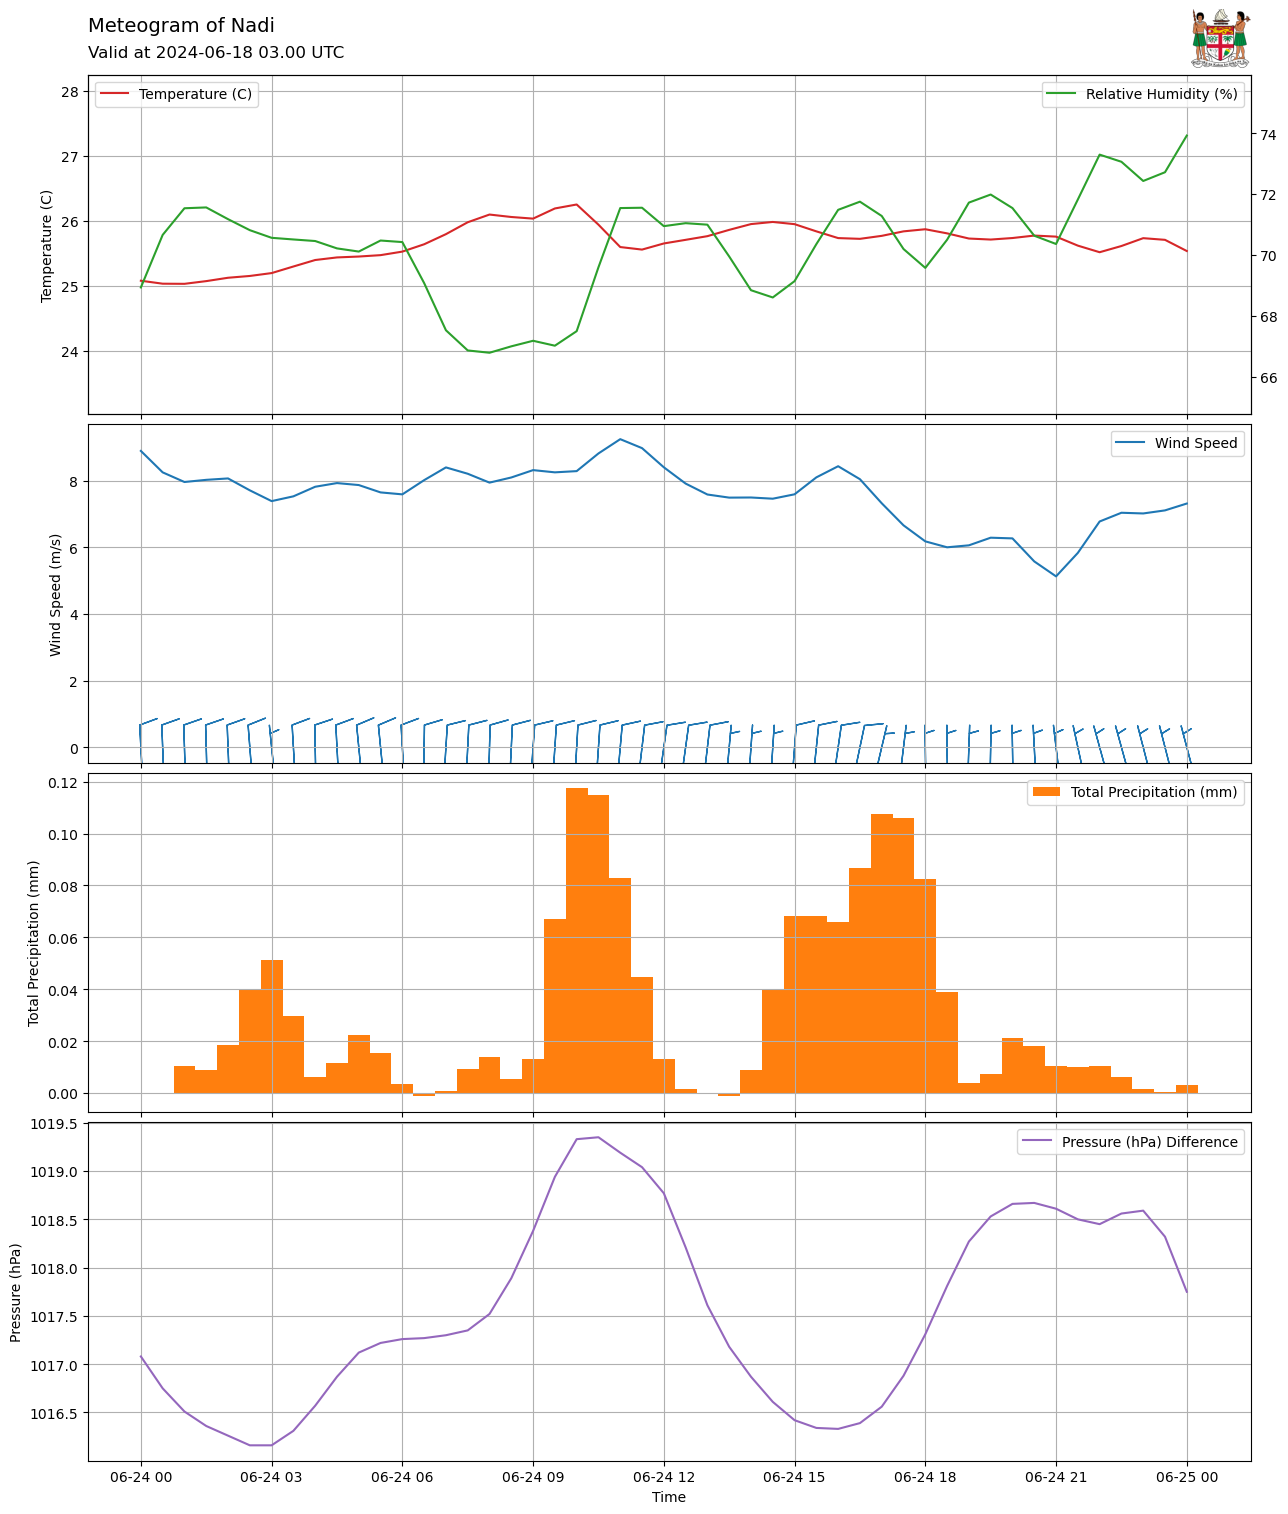

In [41]:
fig, axs = plt.subplots(4, 1, figsize=(15, 18), sharex=True) # Create a figure and a set of subplots

axs[0].plot(df.index, df['t2']-273.15, label='Temperature (C)', color='tab:red')
ax2 = axs[0].twinx()
ax2.plot(df.index, df['rh2'], label='Relative Humidity (%)', color='tab:green')
axs[0].set_ylabel('Temperature (C)')
axs[0].legend(loc='upper left')
ax2.legend(loc='upper right')
axs[0].set_ylim((df['t2']-273.15).min()-2,(df['t2']-273.15).max()+2)
ax2.set_ylim((df['rh2']).min()-2,(df['rh2']).max()+2)

axs[1].plot(df.index, df['ws'], label='Wind Speed', color='tab:blue')
axs[1].barbs(df.index, [0]*len(df.index), df['v10'], df['u10'], length=8, pivot='middle', color='tab:blue')
axs[1].set_ylabel('Wind Speed (m/s)')
axs[1].legend()

axs[2].bar(df.index, df['tp'], width=df.index[1]-df.index[0], label='Total Precipitation (mm)', color='tab:orange')
axs[2].set_ylabel('Total Precipitation (mm)')
axs[2].legend()

axs[3].plot(df.index, df['slp'].round(2), label='Pressure (hPa) Difference', color='tab:purple')
axs[3].set_ylabel('Pressure (hPa)')
axs[3].legend()

for ax in axs:
    ax.grid(True)

axs[-1].set_xlabel('Time')

pos = axs[0].get_position()
title_text = 'Meteogram of Nadi'
time_text = 'Valid at 2024-06-18 03.00 UTC'
ax.text(x=pos.x0, y=pos.y1 + 0.024, s=title_text, fontsize=14,ha="left", transform=fig.transFigure)
ax.text(x=pos.x0, y=pos.y1 + 0.01, s=time_text,transform=fig.transFigure, size=12, ha="left")

lgaxes = fig.add_axes([pos.x1 - 0.04, pos.y1, 0.04, 0.04], )  # l,b,w,h
lgaxes.imshow(plt.imread("D:/Projects/fiji-training-2024/data/Coat_of_arms_of_Fiji.png"))
lgaxes.axis("off")

fig.autofmt_xdate()

#adjust the space between the subplots
plt.subplots_adjust(hspace=0.03)


# Exercise
1. Plot the meteogram for another city in Fiji
2. Resample the data to 10 minutes, and interpolate the data using the quadratic method
3. Use the resampled data for temperature, rh, wind speed, and pressure
4. Use original data for total precipitation

